In [2]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from datetime import datetime

import pytesseract
from PIL import Image, ImageEnhance, ImageFilter, ImageOps

# Distribution of number of posts by hour

In [3]:
statuses = pd.read_csv('1717731545171536_facebook_statuses.csv')
#times = pd.to_datetime(statuses['post_published']).dt.hour

#times.hist(bins = np.arange(24))
#plt.show()

# Distribution of number of posts by date

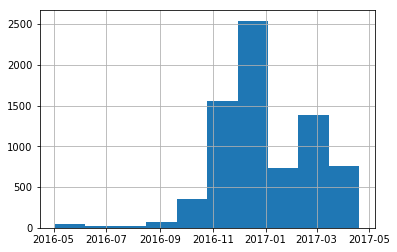

In [4]:
days = pd.to_datetime(statuses['post_published'])
days.hist()

plt.show()

In [5]:
statuses = pd.read_csv('1717731545171536_facebook_statuses.csv')
statuses['num_posts'] = pd.Series(np.ones(len(statuses.index), int), index=statuses.index)
statuses

,b'post_id',post_message,poster_id,poster_name,link_name,post_type,post_link,post_published,num_likes,num_comments,num_shares,update_time,num_posts
0,1717731545171536_1899560873655268,NaN,1349329731820174,Yasamin Vafai,NaN,photo,https://www.facebook.com/photo.php?fbid=134817...,2017-04-18 14:41:53,4419,550,0,2017-04-19 11:25:55,1
1,1717731545171536_1899685076976181,NaN,650738245116648,Ravi Kemburu,NaN,photo,https://www.facebook.com/photo.php?fbid=652414...,2017-04-18 19:58:06,35,9,0,2017-04-19 11:25:40,1
2,1717731545171536_1898900193721336,b'angery reacts only',268841556910044,Aseem Doriwala,NaN,photo,https://www.facebook.com/photo.php?fbid=268762...,2017-04-17 12:30:27,800,129,0,2017-04-19 11:24:15,1
3,1717731545171536_1897810397163649,b'Now available at House of Curries on Durant',1408841595842110,David J. Lim,NaN,photo,https://www.facebook.com/photo.php?fbid=140916...,2017-04-15 16:01:05,2585,619,0,2017-04-19 11:22:42,1
4,1717731545171536_1900035803607775,b'When dance season comes around at Berkeley.',1408841595842110,David J. Lim,NaN,photo,https://www.facebook.com/photo.php?fbid=141283...,2017-04-19 08:57:33,307,68,0,2017-04-19 11:22:26,1
5,1717731545171536_1899735876971101,NaN,10212935435569994,Calley Wang,NaN,photo,https://www.facebook.com/photo.php?fbid=102129...,2017-04-18 22:00:04,317,51,0,2017-04-19 11:22:24,1
6,1717731545171536_1899676780310344,b'Angry reacts only',1410988682291249,Lee Hagaman,NaN,photo,https://www.facebook.com/photo.php?fbid=141439...,2017-04-18 19:36:25,251,30,0,2017-04-19 11:22:09,1
7,1717731545171536_1899203243691031,NaN,10212957541560284,Jasper Louie,NaN,photo,https://www.facebook.com/photo.php?fbid=102129...,2017-04-18 01:47:22,1923,462,0,2017-04-19 11:20:33,1
8,1717731545171536_1899793840298638,b'What is outdoors?',10213333034388703,Lua Varner,NaN,photo,https://www.facebook.com/photo.php?fbid=102133...,2017-04-18 22:43:22,230,14,0,2017-04-19 11:20:30,1
9,1717731545171536_1899689933642362,NaN,1658728137767407,Umar Brown Momen,NaN,photo,https://www.facebook.com/photo.php?fbid=166022...,2017-04-18 20:14:10,3872,614,0,2017-04-19 11:20:02,1


In [6]:
rankings = statuses.groupby(['poster_id','poster_name']).sum().sort_values('num_likes', ascending = False)
rankings = rankings.reset_index()
rankings.index = np.arange(1, len(rankings) + 1)
rankings.loc[lambda rankings: rankings['poster_name']=='Chris Tril', 'num_likes'].iloc[0]

53767

In [7]:
#how to change post_link of Chris Tril's to wow
rankings.ix[rankings.poster_name == 'Chris Tril', 'post_link'] = 'wow'

In [8]:
rankings.loc[lambda rankings: rankings['poster_name']=='Chris Tril', 'post_link'].iloc[0]

'wow'

In [9]:
user_reax = pd.read_csv('user_reactions.csv')
user_reax

CParserError: Error tokenizing data. C error: Expected 5 fields in line 3, saw 23
